In [9]:
import ImageProcessor
import cv2

In [83]:
image_path = '/Users/jiazhengtian/Desktop/image.png'
image = cv2.imread(image_path)
processor = ImageProcessor.ImageProcessor(image)

[2025/03/29 20:26:57] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/Users/jiazhengtian/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='/Users/jiazhengtian/.paddleocr/whl/rec/en/en_PP-OCRv4_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320',

In [84]:
relation = processor.match_relationships()

In [85]:
import pandas as pd
relation = pd.DataFrame(relation)
relation

,0,1
0,Strength,Balance
1,Health,Balance


In [78]:
boxes, texts, scores = processor._extract_text_boxes()

[2025/03/29 19:37:51] ppocr DEBUG: dt_boxes num : 9, elapsed : 0.9458491802215576
[2025/03/29 19:37:51] ppocr DEBUG: cls num  : 9, elapsed : 0.12506985664367676
[2025/03/29 19:37:52] ppocr DEBUG: rec_res num  : 9, elapsed : 1.1056630611419678


In [79]:
texts

['Safety',
 'Trust',
 'Family',
 'Wealth',
 'Work-Life',
 'Valued',
 'Balance',
 'Accomplishment',
 'Determination']

In [37]:
lines = processor.find_lines()

In [38]:
lines

[]

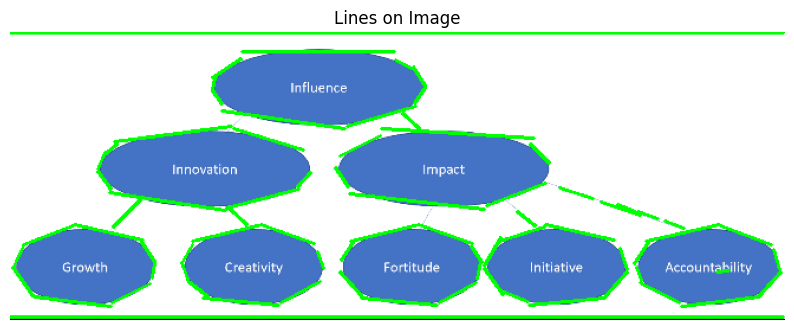

In [13]:
import matplotlib.pyplot as plt

# 在图像上绘制线条（绿色，粗细2）
for (x1, y1, x2, y2) in lines:
    cv2.line(image, (x1, y1), (x2, y2), color=(0, 255, 0), thickness=2)

# OpenCV 是 BGR，matplotlib 使用 RGB，因此需要转换颜色格式
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# 使用 matplotlib 显示图像
plt.figure(figsize=(10, 8))
plt.imshow(image_rgb)
plt.title("Lines on Image")
plt.axis("off")
plt.show()

In [10]:
get_boxes = processor.find_boxes()

# Text Correction

In [1]:
import re
import pandas as pd
from spellchecker import SpellChecker
from textblob import TextBlob

In [ ]:
paths = [
    "/Users/jiazhengtian/Desktop/Research/Paul Ingram_25.2.21/Extracted Data Phase3/2022 E values_extracted.xlsx",
    "/Users/jiazhengtian/Desktop/Research/Paul Ingram_25.2.21/Extracted Data Phase3/2022 G values_extracted.xlsx",
    "/Users/jiazhengtian/Desktop/Research/Paul Ingram_25.2.21/Extracted Data Phase3/2022 M values_extracted.xlsx",
    "/Users/jiazhengtian/Desktop/Research/Paul Ingram_25.2.21/Extracted Data Phase3/2023 B values_extracted.xlsx",
    "/Users/jiazhengtian/Desktop/Research/Paul Ingram_25.2.21/Extracted Data Phase3/2023 E values_extracted.xlsx",
    "/Users/jiazhengtian/Desktop/Research/Paul Ingram_25.2.21/Extracted Data Phase3/2023 G values_extracted.xlsx",
    "/Users/jiazhengtian/Desktop/Research/Paul Ingram_25.2.21/Extracted Data Phase3/2023 M values_extracted.xlsx"
]

In [2]:
# 初始化拼写器
spell = SpellChecker()

In [3]:
# 术语白名单
custom_terms = {
    "wellbeing", 
    "well being",
    "self-esteem",
    "zen",
    "hardwork",
    "hard work",
    "hardworking",
    "max income"
}

In [4]:
def preprocess_text(text):
    if pd.isna(text):
        return ''
    text = str(text).lower()

    # 去除所有 `-` 两边的空格（先做这一步）
    text = re.sub(r"\s*-\s*", "-", text)
    # 在标点前后加空格（只处理常见标点: , . ; : ! ? & /）
    text = re.sub(r"([,.;:!?&/])", r" \1 ", text)
    # 去掉多余空格
    text = re.sub(r"\s+", " ", text).strip()
    return text
    

def correct_text(text):
    processed = preprocess_text(text)
    corrected_words = []

    # 如果完整文本在术语中，直接返回
    if processed in custom_terms:
        return processed

    # 否则对每个词进行拼写检查（保留术语）
    for word in processed.split():
        if word in custom_terms or re.match(r"^([,.;:!?&])$", word):  # 标点或术语保留
            corrected_words.append(word)
        else:
            corrected = spell.correction(word)
            corrected_words.append(corrected if corrected else word)

    return ' '.join(corrected_words)



In [86]:
paths = ["/Users/jiazhengtian/Desktop/Research/Paul Ingram_25.2.21/Extracted Data Phase3/2023 G values_extracted.xlsx"]

In [87]:
for path in paths:
    df = pd.read_excel(path)

    df['From_corrected'] = df['From'].apply(correct_text)
    df['To_corrected'] = df['To'].apply(correct_text)

    df.to_excel(path, index=False)

# Data Combination

In [94]:
excel_paths = [
    "/Users/jiazhengtian/Desktop/Research/Paul Ingram_25.2.21/Extracted Data Phase3/2022.xlsx",
    "/Users/jiazhengtian/Desktop/Research/Paul Ingram_25.2.21/Extracted Data Phase3/2023.xlsx",
    "/Users/jiazhengtian/Desktop/Research/Paul Ingram_25.2.21/Extracted Data Phase3/2024.xlsx"
]

In [95]:
df_total = pd.DataFrame()
for paths in excel_paths:
    df = pd.read_excel(paths)
    df_total = pd.concat([df_total, df])
    df_total.to_excel('/Users/jiazhengtian/Desktop/total.xlsx', index=False)
